## AGE별 K-평균 군집분석

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Load the data
file_path = '/Users/yujunwon/Work/customer_data_.csv'
df = pd.read_csv(file_path, encoding='cp949')

# Extract 'AGE' column and reshape it to 2D array for clustering
age_data = df['AGE'].values.reshape(-1, 1)

# Initialize KMeans model with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to the 'AGE' data
kmeans.fit(age_data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

cluster_centers, np.unique(cluster_labels, return_counts=True)
    

/opt/homebrew/Caskroom/miniconda/base/envs/portfolio/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xj/g808h2sx0cx0z219xzc0qk7r0000gn/T/ipykernel_27542/3480663272.py:16: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(age_data)


(array([[2.],
        [4.],
        [3.],
        [1.],
        [5.],
        [6.],
        [3.]]),
 (array([0, 1, 2, 3, 4, 5], dtype=int32),
  array([1538, 3124, 4775, 1454, 1057,   52])))

## 클러스터 시각화

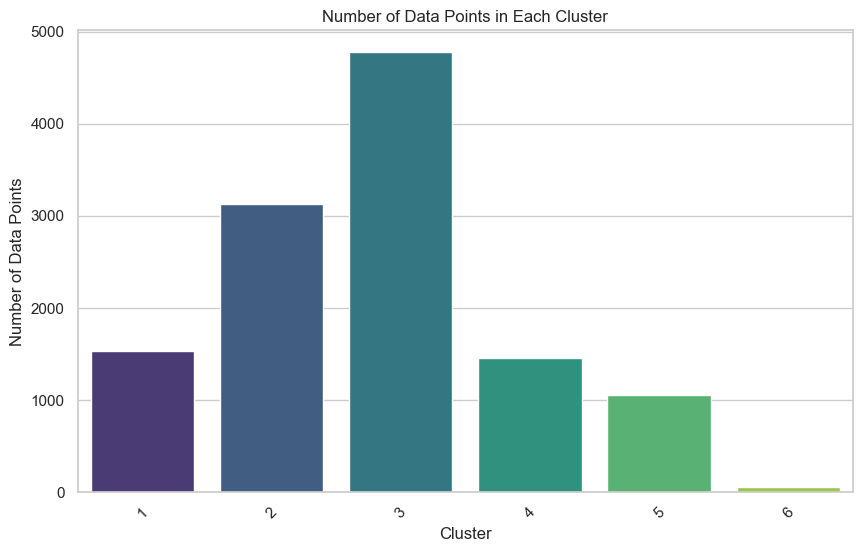

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")

# Unique cluster labels and counts
labels, counts = np.unique(cluster_labels, return_counts=True)

# Plotting barplot
plt.figure(figsize=(10,6))
sns.barplot(x=labels + 1, y=counts, palette="viridis")
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.show()
    

## 6번 클러스터 분석

In [4]:

# Extract rows where 'AGE' is 6
age_6_df = df[df['AGE'] == 6]

# Get descriptive statistics for 'AGE' == 6 subset
age_6_descriptive_stats = age_6_df.describe(include='all').transpose()
non_numeric_cols = age_6_df.select_dtypes(include=['object']).columns.tolist()

# For non-numeric columns, calculate the frequency of each unique value
value_counts = {}
for col in non_numeric_cols:
    value_counts[col] = age_6_df[col].value_counts(normalize=True).to_dict()

age_6_descriptive_stats, value_counts
    

(                        count unique    top freq            mean  \
 clust                    52.0    NaN    NaN  NaN        0.923077   
 AGE                      52.0    NaN    NaN  NaN             6.0   
 등록(계/피)                    52      2    계약자   34             NaN   
 고용상태                       52      1     고용   52             NaN   
 성별                       52.0    NaN    NaN  NaN        0.576923   
 Willingness to pay/Stay  52.0    NaN    NaN  NaN       13.659276   
 갱신                       52.0    NaN    NaN  NaN        0.307692   
 상품타입                       52      3     중급   27             NaN   
 교육수준                       52      3   대학졸업   32             NaN   
 소득                       52.0    NaN    NaN  NaN      75538750.0   
 지역                         52      2   도시근교   51             NaN   
 결혼여부                       52      2     기혼   38             NaN   
 월 납입액                    52.0    NaN    NaN  NaN   199423.076923   
 VOC                      52.0    